# Airline Passenger Satisfaction
Using machine learning to predict customer satisfaction for an Airline?

Data source - [Airline Passenger Satisfaction, Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

## Importation of required libraries

In [1]:
# Import libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import seaborn as sns  # Data visualization
from sklearn.model_selection import train_test_split  # Data splitting
import matplotlib.pyplot as plt  # Plotting

# Set style for plot
plt.style.use('ggplot')  # Use ggplot style for consistent aesthetics

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')  # Suppress warnings

# Import preprocessing and evaluation tools
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    ConfusionMatrixDisplay,  # Display confusion matrix
    accuracy_score,  # Calculate accuracy
    f1_score,  # Calculate F1 score
    recall_score,  # Calculate recall
    precision_score,  # Calculate precision
)


## Loading the data

In [2]:
# Read the airline data from the CSV file
df = pd.read_csv("airline-data-train.csv")

## Exploratory Data Analysis (EDA)

In [3]:
# display first five rows of the data 
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Get summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


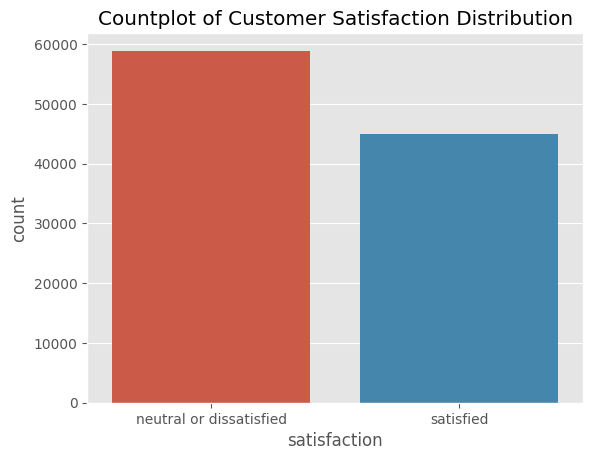

In [5]:
# Count the occurrences of each value in the 'satisfaction' column
print(df['satisfaction'].value_counts())

# Create a countplot to visualize the distribution of customer satisfaction
sns.countplot(df['satisfaction'])

# Add a title for the plot
plt.title('Countplot of Customer Satisfaction Distribution')

# Show the plot
plt.show()

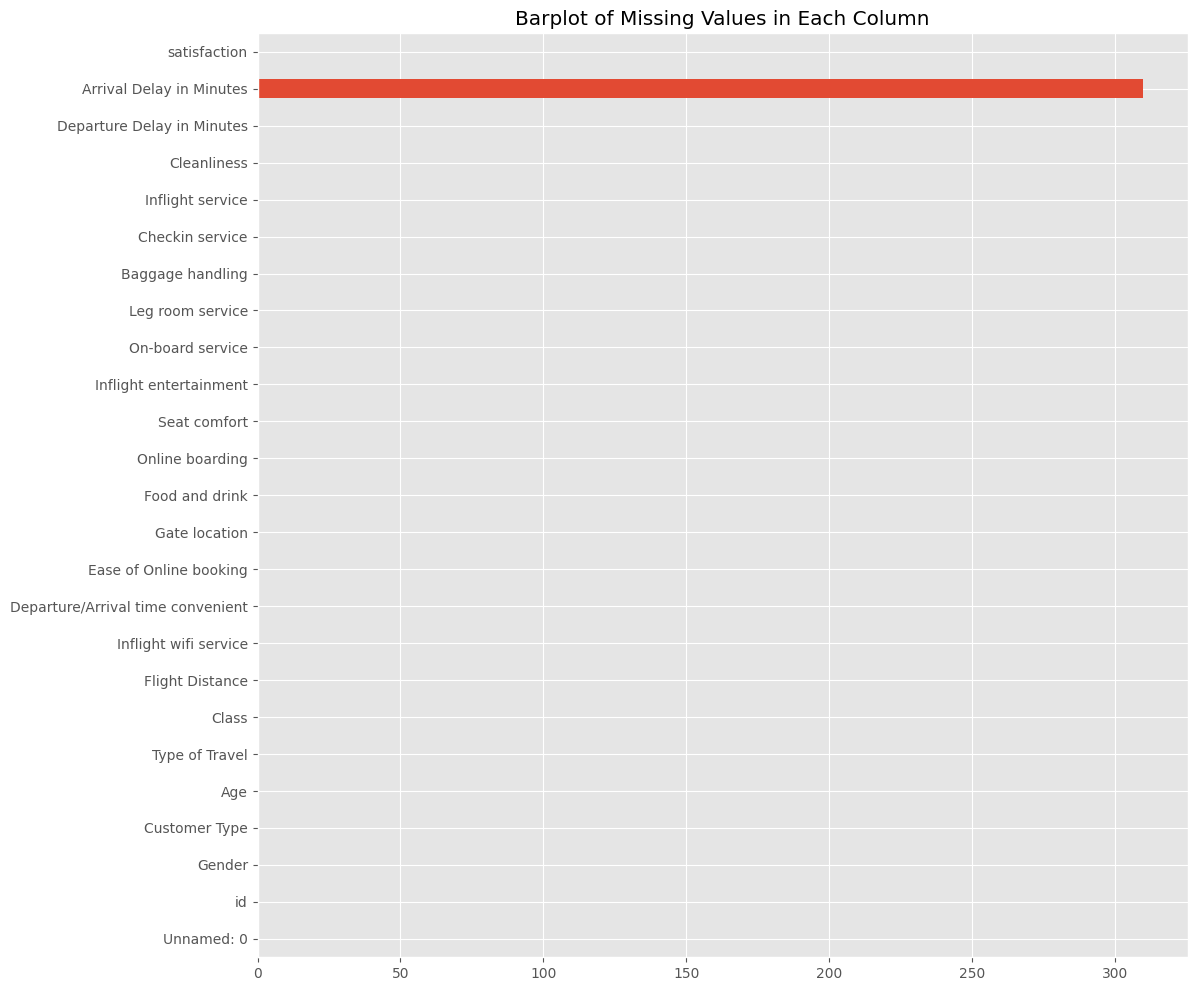

In [6]:
# Identify missing values in each column
missing = df.isnull().sum()

# Create a horizontal bar chart to visualize missing values
missing.plot(kind="barh", figsize=(12, 12))

# Add a title to the plot
plt.title("Barplot of Missing Values in Each Column")

# Show the plot
plt.show()

In [7]:
no_of_columns_with_missing_values=df.isnull().any().sum()
no_of_rows_with_missing_values=df.isnull().any(axis=1).sum()
total_number_of_missing_values=df.isnull().sum().sum()
print('There are {} columns that have at least one missing value.'.format(no_of_columns_with_missing_values))
print('There are {} rows that have at least one missing value.'.format(no_of_rows_with_missing_values))
print('There is a total of {} missing values in the dataset.'.format(total_number_of_missing_values))

There are 1 columns that have at least one missing value.
There are 310 rows that have at least one missing value.
There is a total of 310 missing values in the dataset.


## Exploring the Object(Categorical) Columns

In [8]:
# Select columns with object data type excluding 'satisfaction' column
object_cols = (df.select_dtypes("object").columns).difference(["satisfaction"])

# Loop through each object column
for object_col in object_cols:
    # Print the number of unique values for each column
    print("The {} column has {} unique values.".format(object_col, df[object_col].nunique()))

The Class column has 3 unique values.
The Customer Type column has 2 unique values.
The Gender column has 2 unique values.
The Type of Travel column has 2 unique values.


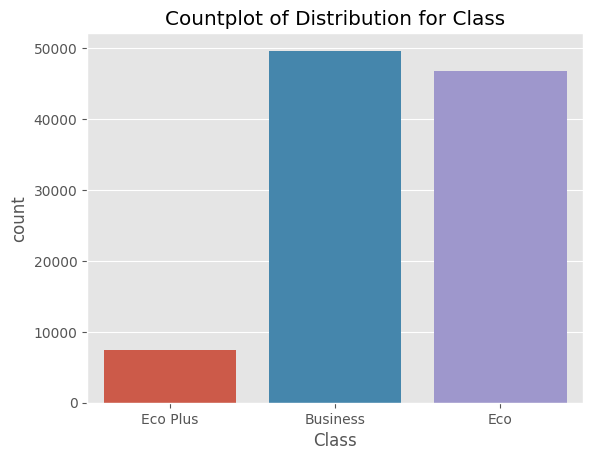

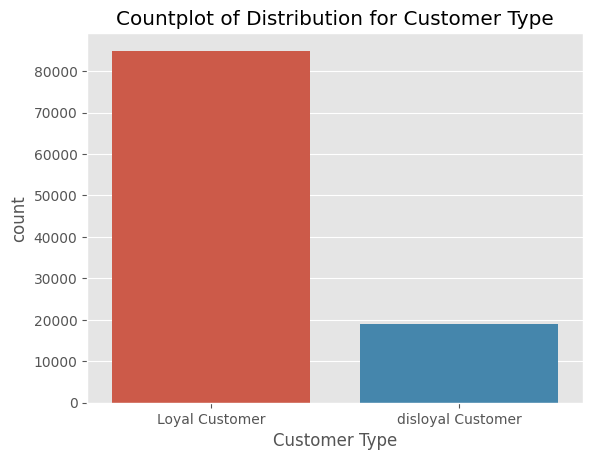

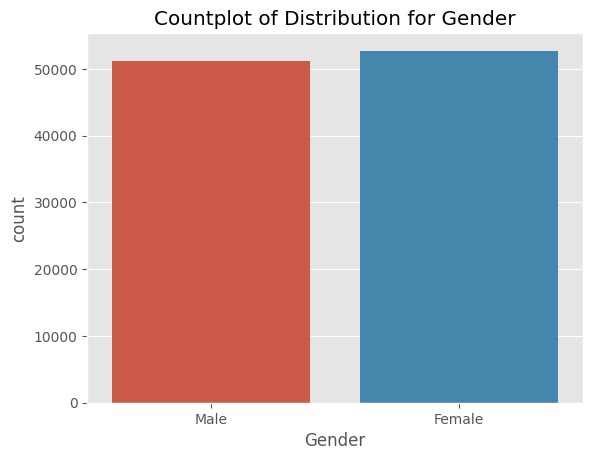

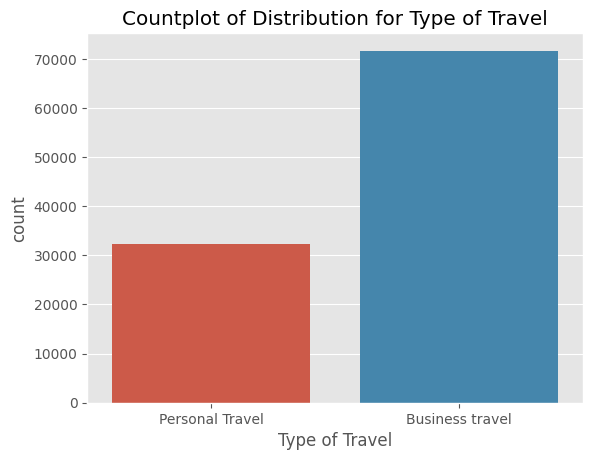

In [9]:
# Create countplots for each object column
for col in object_cols:
    # Generate a countplot for the current column
    sns.countplot(df[col])

    # Add a title to the plot
    plt.title(f"Countplot of Distribution for {col}")

    # Show the plot
    plt.show()

## Exploring the numeric(Continuous) columns in the data 

In [10]:
# Select numeric columns (excluding ID and unnamed column)
cont_cols = (df.select_dtypes([int, float]).columns).difference(["id", "Unnamed: 0"])

# Get descriptive statistics of numeric columns
df[cont_cols].describe()

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Flight Distance,Food and drink,Gate location,Inflight entertainment,Inflight service,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort
count,103904.000000,103594.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,15.178678,3.631833,3.304290,3.286351,14.815618,3.060296,2.756901,1189.448375,3.202129,2.976883,3.358158,3.640428,2.729683,3.351055,3.382363,3.250375,3.439396
std,15.114964,38.698682,1.180903,1.265396,1.312273,38.230901,1.525075,1.398929,997.147281,1.329533,1.277621,1.332991,1.175663,1.327829,1.315605,1.288354,1.349509,1.319088
min,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,3.000000,3.000000,2.000000,0.000000,2.000000,2.000000,414.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,40.000000,0.000000,4.000000,3.000000,3.000000,0.000000,3.000000,3.000000,843.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000
75%,51.000000,13.000000,5.000000,4.000000,4.000000,12.000000,4.000000,4.000000,1743.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,85.000000,1584.000000,5.000000,5.000000,5.000000,1592.000000,5.000000,5.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


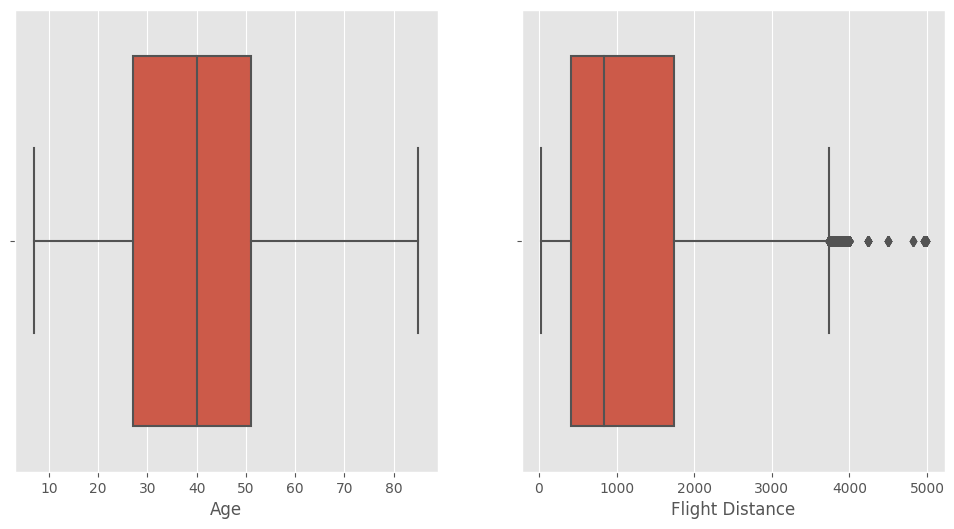

In [11]:
# Create a figure object and two subplots
f, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set figure width
f.set_figwidth(12)

# Create boxplots for Age and Flight Distance
sns.boxplot(df['Age'], ax=axes[0])
sns.boxplot(df['Flight Distance'], ax=axes[1])

# Show the plot
plt.show()


## Results of EDA
From the EDA above I noticed the following:
- The data has 3075 rows and 12 columns
- There are 6 continous features , 3 object(string) columns, 1 target column, 1 index column, 1null column
* There is no significant class imbalance because there are 58879 neutral and dissatisfied in the dataset and 45025 fraudulent ones. 
* There is 1 column that have at least one missing value.
* All rows that have at least one missing value.
* There is a total of 3075 missing values in the dataset.


## Data Cleaning and Preprocessing 
* Dropping non-useful columns
* Handling  missing values
* Handling of categorical features 
* Seperating the target and features



### Dropping non-useful columns
Two columns were found to be non-useful: 
- 'id' 
- 'Unnamed: 0'

In [12]:
# dropping non-useful columns 
drop_cols=['id','Unnamed: 0']
df.drop(drop_cols,axis=1, inplace =True) 

### Handling Missing Values 
Only one column, 'Arrival Delay in Minutes' was found to contain missing values. Missing values was filled with the median value 

In [13]:
# fill missing values with median 
df.fillna(df.median(), inplace=True)
total_number_of_missing_values=df.isnull().sum().sum()
print('There is a total of {} missing values after filling.'.format(total_number_of_missing_values))

There is a total of 0 missing values after filling.


### Handling Categorical features with label encoding 

In [14]:
# Label Encoding Catgorical Columns 
cat_cols=df.select_dtypes('object').columns 
lab=LabelEncoder()
df[cat_cols]= df[cat_cols].apply(lab.fit_transform)

### Separating Targets and features: X and Y

In [15]:
# Separate features and target variable
X = df.drop("satisfaction", axis=1)  # Features
y = df["satisfaction"]  # Target variable

### Scaling the data with StandardScaler

In [16]:
# scaling with standard scaler
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

## Data Splitting 
Further splitting the datset into training and testing sets. A random split was used with a split ratio of 70-30. 70% for the train and the remaining 30% for the test. A random state of 42 was set to ensure reproducability of the code. 

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True)

## Helper Funtions 
This code below defines several functions to compute and plot classification metrics for a machine learning model.

The compute_metrics function takes three arguments: y_test, preds, and model_name. It uses these inputs to compute and print several classification metrics: accuracy score, F1 score, ROC-AUC score, precision score, and recall score. It also saves the results of each metric to corresponding dictionaries: accuracy_results, f1_results, roc_auc_results, precision_results, and recall_results.

The plot_conf_matrix function takes four arguments: model_name, y_test, preds,labels. It uses these inputs to compute the confusion matrix for the model predictions and plot it using the ConfusionMatrixDisplay function from scikit-learn.


In [18]:
# Dictionary to store the different metric results
precision_results = {}
recall_results = {}
accuracy_results = {}
f1_results = {}


# Define function to plot confusion matrix
def plot_conf_matrix(model, y_test, preds):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap="coolwarm")
    plt.title(f"Confusion Matrix of {model}")
    plt.grid(False)
    plt.show()

# Define function to compute and print various evaluation metrics
def compute_metrics(y_test, preds, model_name):
    # Calculate accuracy
    acc = accuracy_score(y_test, preds)
    accuracy_results[model_name] = acc
    print(f"Accuracy score for {model_name}: {acc}")

    # Calculate F1 score
    f1 = f1_score(y_test, preds)
    f1_results[model_name] = f1
    print(f"F1 score for {model_name}: {f1}")

    # Calculate precision
    precision = precision_score(y_test, preds)
    precision_results[model_name] = precision
    print(f"Precision score for {model_name}: {precision}")

    # Calculate recall
    recall = recall_score(y_test, preds)
    recall_results[model_name] = recall
    print(f"Recall score for {model_name}: {recall}")

## Modelling

### Importation of models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifier(DT)

Accuracy score for DT: 0.9207622225073784
F1 score for DT: 0.9076221108534669
Precision score for DT: 0.9247770749180703
Recall score for DT: 0.8910920173312771


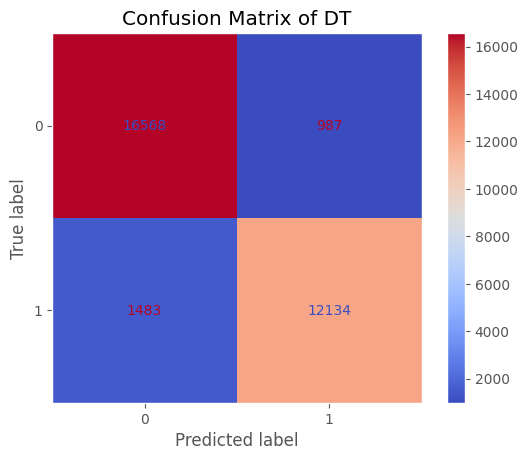

In [20]:
# Initialize and fit decision tree model
dt = DecisionTreeClassifier(random_state=12, max_depth=8, max_features=4)
dt.fit(X_train, y_train)  # Train the model with training data

# Make predictions on testing data
preds = dt.predict(X_test)  # Predict target values for testing data

# Compute and print evaluation metrics
compute_metrics(y_test, preds, "DT")  # Calculate and print accuracy, F1, precision, and recall for the decision tree model

# Plot confusion matrix for the decision tree model
plot_conf_matrix("DT", y_test, preds)  # Visualize the confusion matrix for the decision tree model

### Logistic Regression (log_reg)

Accuracy score for log_reg: 0.8755293211856795
F1 score for log_reg: 0.854409005628518
Precision score for log_reg: 0.8735517532417709
Recall score for log_reg: 0.8360872438863186


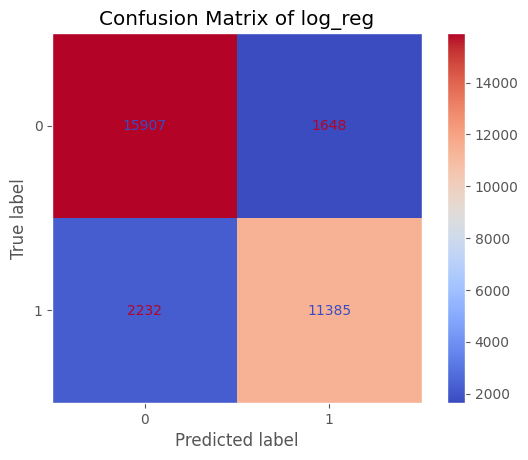

In [21]:
# Initialize and fit logistic regression model
log_reg = LogisticRegression(C=10, max_iter=100)
log_reg.fit(X_train, y_train)  # Train the model with training data

# Make predictions on testing data
preds = log_reg.predict(X_test)  # Predict target values for testing data

# Compute and print evaluation metrics
compute_metrics(y_test, preds, "log_reg")  # Calculate and print accuracy, F1, precision, and recall for the logistic regression model

# Plot confusion matrix for the logistic regression model
plot_conf_matrix("log_reg", y_test, preds)  # Visualize the confusion matrix for the logistic regression model

In [22]:
# Create a DataFrame from dictionaries containing evaluation metrics
results_df = pd.DataFrame.from_dict([
    precision_results,
    recall_results,
    accuracy_results,
    f1_results
])

# Transpose the DataFrame for better readability
results_df = results_df.transpose()

# Rename columns for clarity
results_df.columns = ['precision', 'recall', 'accuracy', 'f1-score']

# Set "Model" as index name for easier reference
results_df.index = results_df.index.set_names(['Model'])

# Convert MultiIndex to regular index for convenience
results_df.reset_index(inplace=True)

# Save the results as a CSV file
results_df.to_csv('results.csv', index=False)

# Display the final DataFrame
display(results_df)


,Model,precision,recall,accuracy,f1-score
0,DT,0.924777,0.891092,0.920762,0.907622
1,log_reg,0.873552,0.836087,0.875529,0.854409
